In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [23]:
# Step 1: Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')  # Replace with your actual file path
print("Initial Data Info:\n")
print(df.info())
print("\nMissing Values:\n")
print(df.isnull().sum())


Initial Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin      

In [24]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [25]:

# Step 2: Handle missing values
# Example: Fill Age and Fare with median; Embarked with mode
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\rohit\AppData\Local\Temp\ipykernel_9832\781731210.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\rohit\AppData\Local\Temp\ipykernel_9832\781731210.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [26]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [27]:


print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [28]:
# Step 3: Convert categorical variables to numerical using Label Encoding
cat_cols = ['Sex', 'Embarked']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [30]:


# Step 4: Normalize/Standardize numerical features
scaler = StandardScaler()
num_cols = ['Age', 'Fare']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,NaN,2


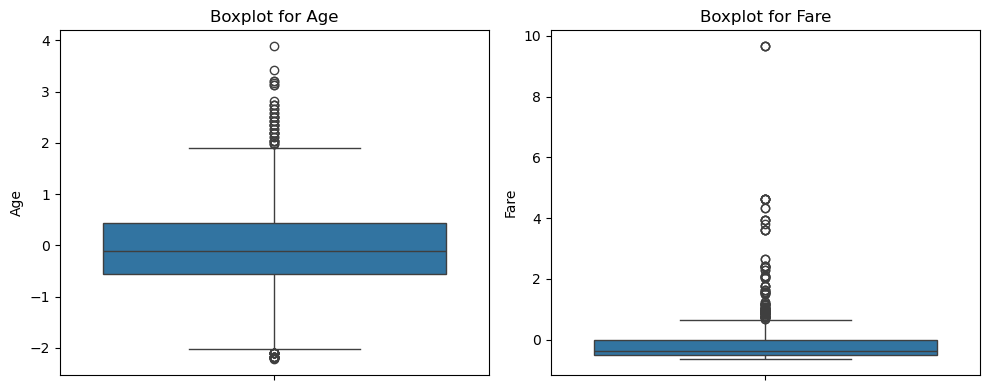

In [32]:
# Step 5: Visualize and remove outliers using boxplots
plt.figure(figsize=(10, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

In [33]:








# Optional: Remove outliers (using IQR method)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Final Data Summary
print("\nCleaned Data Info:\n")
print(df.info())



Cleaned Data Info:

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  718 non-null    int64  
 1   Survived     718 non-null    int64  
 2   Pclass       718 non-null    int64  
 3   Name         718 non-null    object 
 4   Sex          718 non-null    int32  
 5   Age          718 non-null    float64
 6   SibSp        718 non-null    int64  
 7   Parch        718 non-null    int64  
 8   Ticket       718 non-null    object 
 9   Fare         718 non-null    float64
 10  Cabin        97 non-null     object 
 11  Embarked     718 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 67.3+ KB
None


In [34]:
# Remove 'Cabin' column and store final cleaned data
df_cleaned = df.drop(columns=['Cabin'])

# Final Data Summary
print("\nCleaned Data Info:\n")
print(df_cleaned.info())

# Save to CSV for download
df_cleaned.to_csv('cleaned_data.csv', index=False)



Cleaned Data Info:

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  718 non-null    int64  
 1   Survived     718 non-null    int64  
 2   Pclass       718 non-null    int64  
 3   Name         718 non-null    object 
 4   Sex          718 non-null    int32  
 5   Age          718 non-null    float64
 6   SibSp        718 non-null    int64  
 7   Parch        718 non-null    int64  
 8   Ticket       718 non-null    object 
 9   Fare         718 non-null    float64
 10  Embarked     718 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 61.7+ KB
None
